<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#&quot;Predict-Future-Sales&quot;" data-toc-modified-id="&quot;Predict-Future-Sales&quot;-1">"Predict Future Sales"</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.0.0.1">Description</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.0.0.2">Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#0-Preliminaries" data-toc-modified-id="0-Preliminaries-1.1">0 Preliminaries</a></span><ul class="toc-item"><li><span><a href="#0.0-Importing-Packages-and-Modules" data-toc-modified-id="0.0-Importing-Packages-and-Modules-1.1.1">0.0 Importing Packages and Modules</a></span></li><li><span><a href="#0.1-Importing-the-datasets" data-toc-modified-id="0.1-Importing-the-datasets-1.1.2">0.1 Importing the datasets</a></span></li></ul></li><li><span><a href="#1-Overview" data-toc-modified-id="1-Overview-1.2">1 Overview</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Size" data-toc-modified-id="Size-1.2.0.1">Size</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.2.0.2">Conclusions</a></span></li><li><span><a href="#Column-names-and-primary-keys" data-toc-modified-id="Column-names-and-primary-keys-1.2.0.3">Column names and primary keys</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.2.0.4">Missing values</a></span></li></ul></li></ul></li><li><span><a href="#2-Merging-and-aggregations" data-toc-modified-id="2-Merging-and-aggregations-1.3">2 Merging and aggregations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Items-and-item-categories" data-toc-modified-id="Items-and-item-categories-1.3.0.1">Items and item categories</a></span></li><li><span><a href="#Shops-names-and-categories-into-the-training-set" data-toc-modified-id="Shops-names-and-categories-into-the-training-set-1.3.0.2">Shops names and categories into the training set</a></span></li><li><span><a href="#Add-numerical-values-for-dates" data-toc-modified-id="Add-numerical-values-for-dates-1.3.0.3">Add numerical values for dates</a></span></li></ul></li></ul></li><li><span><a href="#3-Exploring-the-data" data-toc-modified-id="3-Exploring-the-data-1.4">3 Exploring the data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Feature--ideas" data-toc-modified-id="Feature--ideas-1.4.0.1">Feature  ideas</a></span></li></ul></li></ul></li></ul></li></ul></div>

# "Predict Future Sales"

**Kaggle Competition and Final project for "How to win a data science competition" Coursera course"**

_Getting to know the database_


#### Description

This challenge serves as final project for the "How to win a data science competition" Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

#### Evaluation

Submissions are evaluated by root mean squared error (RMSE). True target values are clipped into [0,20] range.

Submission File : For each id in the test set, you must predict a total number of sales. The file should contain a header and have the following format:

ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5
etc.

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Installations and importations required in the virtual environment.

In [2]:
# import os
# # !pip install -r requirements.txt

In [3]:
# from K1_functions import *

Importation of modules and packages. 

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

from K1_functions import *

Setting pandas display options.

In [5]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

Saving requirements

In [6]:
# !pip freeze > requirements_merging.txt

### 0.1 Importing the datasets

In [7]:
import os
os.getcwd()

'C:\\Users\\Maryse\\Documents\\FORMATION\\OCR_DS\\K1_Pred_Fut_Sales'

In [8]:
path_data = os.path.abspath(os.path.join(os.getcwd(), 'DATA')) # '..',
path_data

'C:\\Users\\Maryse\\Documents\\FORMATION\\OCR_DS\\K1_Pred_Fut_Sales\\DATA'

In [9]:
# get the name of all the .csv files in the 'DATA' directory

li_files = []
for n_dir, _, n_files in os.walk(path_data):
    li_files = n_files
li_files = sorted(li_files)
print(li_files)

['item_categories.csv', 'items.csv', 'sales_train.csv', 'sample_submission.csv', 'shops.csv', 'test.csv']


In [10]:
li_key_names = [os.path.splitext(name)[0][:8] for name in li_files]
dict_df = {}

In [11]:
for k, n_file in zip(li_key_names, li_files):
    print(k,'---', n_file)
    dict_df[k] = pd.read_csv(path_data+'\\'+ n_file) # encoding = "ISO-8859-1"

item_cat --- item_categories.csv
items --- items.csv
sales_tr --- sales_train.csv
sample_s --- sample_submission.csv
shops --- shops.csv
test --- test.csv


In [12]:
dict_df.keys()

dict_keys(['item_cat', 'items', 'sales_tr', 'sample_s', 'shops', 'test'])

## 1 Overview

#### Size

In [13]:
# Have an overview of the content

for k, df in dict_df.items():
    display(f"{k}: {df.shape}")

'item_cat: (84, 2)'

'items: (22170, 3)'

'sales_tr: (2935849, 6)'

'sample_s: (214200, 2)'

'shops: (60, 2)'

'test: (214200, 3)'

#### Conclusions
- 5 useful databases on 6 ('sample_submission' is only there to give an example).
- Most of the data in 'sales_tr' and 'sample_s'.
- Table 'test' has 7.3% of the training data.
- 22k distinct items and 84 categories for a 2M database
- 'shops', 'items' and 'item_cat' will have to be merged

#### Column names and primary keys

In [14]:
print("COLUMNS NAMES")
for k, df in dict_df.items():
    print('*', k)
    li_cols = dict_df[k].columns
    print(li_cols)

COLUMNS NAMES
* item_cat
Index(['item_category_name', 'item_category_id'], dtype='object')
* items
Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
* sales_tr
Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'], dtype='object')
* sample_s
Index(['ID', 'item_cnt_month'], dtype='object')
* shops
Index(['shop_name', 'shop_id'], dtype='object')
* test
Index(['ID', 'shop_id', 'item_id'], dtype='object')


In [15]:
# check the primary ids in the columns of each table

for n_table, n_file in zip(li_key_names, li_files):
    print('--', n_file)
    print([col for col in dict_df[n_table].columns if dict_df[n_table][col].is_unique])

-- item_categories.csv
['item_category_name', 'item_category_id']
-- items.csv
['item_name', 'item_id']
-- sales_train.csv
[]
-- sample_submission.csv
['ID']
-- shops.csv
['shop_name', 'shop_id']
-- test.csv
['ID']


To merge :
- left:'items', right:'item_cat' on 'item_category_id', how: 'left join'
- left:'sales_tr', right:'items' on 'items_id', how: 'left join'
- left:'sales_tr', right:'shops' on 'shop_id', how: 'left join'
- left:'test', right:'items' on 'items_id', how: 'left join'
- left:'test', right:'shops' on 'shop_id', how: 'left join'

#### Missing values

In [16]:
# Have an overview of the missing values

df_missing = pd.DataFrame()
for n_df, df in dict_df.items():
    df_missing = pd.concat([df_missing,
                            missing_data(df)['Percent'].to_frame(name=n_df)],
                           axis=1)
df_missing

,item_cat,items,sales_tr,sample_s,shops,test
item_category_id,0.00,0.00,nan,nan,nan,nan
item_category_name,0.00,nan,nan,nan,nan,nan
item_id,nan,0.00,0.00,nan,nan,0.00
item_name,nan,0.00,nan,nan,nan,nan
item_cnt_day,nan,nan,0.00,nan,nan,nan
item_price,nan,nan,0.00,nan,nan,nan
shop_id,nan,nan,0.00,nan,0.00,0.00
date_block_num,nan,nan,0.00,nan,nan,nan
date,nan,nan,0.00,nan,nan,nan
item_cnt_month,nan,nan,nan,0.00,nan,nan


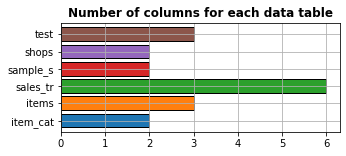

In [17]:
# plot the number of columns of each data table

colors = sns.color_palette('tab10')[:df_missing.shape[0]]
df_missing.count().plot.barh(ec='k', color=colors, width=0.8)
plt.title('Number of columns for each data table', fontweight='bold')
plt.gcf().set_size_inches(5,2)
plt.grid()

In [18]:
# rearrange the ratio of missing values in each columns

df_missing_pct = df_missing.T.stack().reset_index()
df_missing_pct.columns = ['data_table', 'column', 'missing_pct']
df_missing_pct.sample(3)

,data_table,column,missing_pct
13,shops,shop_id,0.00
10,sales_tr,date,0.00
9,sales_tr,date_block_num,0.00


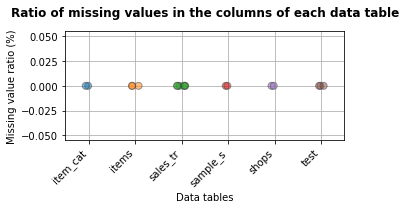

In [19]:
# visualize missing value ratios for columns of each table

sns.stripplot(x='data_table', y='missing_pct', data=df_missing_pct,
              linewidth=1, alpha = 0.5, size=7)
plt.gcf().set_size_inches(6,3)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.set_ylabel('Missing value ratio (%)')
ax.set_xlabel('Data tables')
ax.set_title('Ratio of missing values in the columns of each data table',
             fontweight='bold', pad=15)
plt.gcf().set_size_inches(5,2)
plt.grid()

## 2 Merging and aggregations

#### Items and item categories

In [20]:
# Check unicity

print(dict_df['items']['item_name'].value_counts().unique())
print(dict_df['items']['item_id'].value_counts().unique())

[1]
[1]


-> all items ('item_id' and 'item_name') are unique items.

In [25]:
# Merge items_cat into items

df_item = pd.merge(dict_df['item_cat'], dict_df['items'],
              on='item_category_id', how='left')
df_item

,item_category_name,item_category_id,item_name,item_id
0,PC - Гарнитуры/Наушники,0,PC: Гарнитура HyperX Cloud Core игровая стерео (KHX-HSCC-BK-BR),5441
1,PC - Гарнитуры/Наушники,0,Наушники PHILIPS SBC HC8680,16255
2,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-120,16256
3,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-124 Black,16257
4,Аксессуары - PS2,1,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb - 102304: SCEE),5606
...,...,...,...,...
22165,Элементы питания,83,Элемент питания GP 15AU (LR6) - Блистер 2 шт Ultra,22095
22166,Элементы питания,83,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096
22167,Элементы питания,83,Элемент питания GP 24AU (LR03) - Блистер 2 шт Ultra,22097
22168,Элементы питания,83,Элемент питания КОСМОС LR03 2*BL,22098


#### Shops names and categories into the training set

In [35]:
# Merge 'shops' into 'sales_tr'

df_train = pd.merge(dict_df['sales_tr'], dict_df['shops'],
                    on='shop_id', how='left')

In [37]:
df_train.columns, df_item.columns

(Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'shop_name'], dtype='object'),
 Index(['item_category_name', 'item_category_id', 'item_name', 'item_id'], dtype='object'))

In [38]:
# Merge 'df_item' into 'sales_tr'

df_train = pd.merge(df_train, df_item,
                    on='item_id', how='left')

In [40]:
df_train.sample(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
958460,13.10.2013,9,28,20127,399.00,2.00,"Москва ТЦ ""МЕГА Теплый Стан"" II",Кино - DVD,40,УЧЕНИК МАСТЕРА
2485712,27.03.2015,26,42,4870,1299.00,1.00,"СПб ТК ""Невский Центр""",Игры - XBOX 360,23,"Minecraft [Xbox 360, английская версия]"
518786,26.05.2013,4,18,4809,299.00,1.00,"Красноярск ТЦ ""Июнь""",Игры PC - Стандартные издания,30,"Medal of Honor: Warfighter. Limited Edition [PC, русская версия]"


In [93]:
df_train.head(1)

,date,date_num,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
0,2013-01-02,15707.00,0,59,22154,999.00,1.00,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)


In [94]:
df_train.tail(1)

,date,date_num,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
2935848,2015-10-03,16711.00,33,25,7460,299.00,1.00,"Москва ТРК ""Атриум""",Музыка - CD локального производства,55,V/A The Golden Jazz Collection 1 2CD


#### Add numerical values for dates

In [73]:
# Parse dates to datetime64[ns]

df_train['date'] = pd.to_datetime(df_train['date'], format="%d.%m.%Y")

In [77]:
# Add a numerical column for dates

import matplotlib.dates as mpd

df_train.insert(1, 'date_num', mpd.date2num(df_train['date'])) 

## 3 Exploring the data

In [90]:
df_train.columns

Index(['date', 'date_num', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'shop_name', 'item_category_name', 'item_category_id', 'item_name'],
      dtype='object')

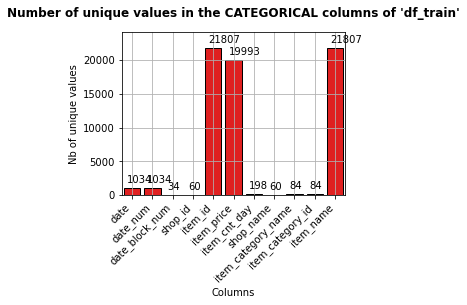

In [79]:
# number of unique values in each categorical column

plot_simple_barplot(x = df_train.columns,
                    y =  df_train.nunique(),
                    x_lab='Columns', y_lab='Nb of unique values',
                    title="Number of unique values in the CATEGORICAL columns of 'df_train'",
                    shorten_label=15, figsize=(4,3), color='red',
                    annotate=True)

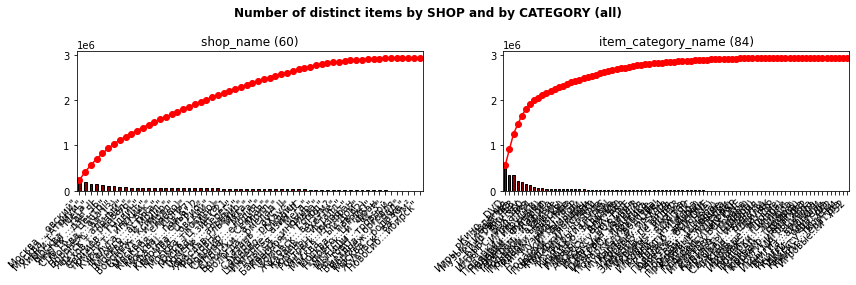

In [149]:
# explore the values of the categorical columns

cat_cols = ['shop_name', 'item_category_name']
plot_barplots(df_train, cat_cols, figsize=(12, 4), n_cols=2, n_col_limit=84,
              shorten_label=7, color='darkred', cum_plot=True,
              title="Number of distinct items by SHOP and by CATEGORY (all)")


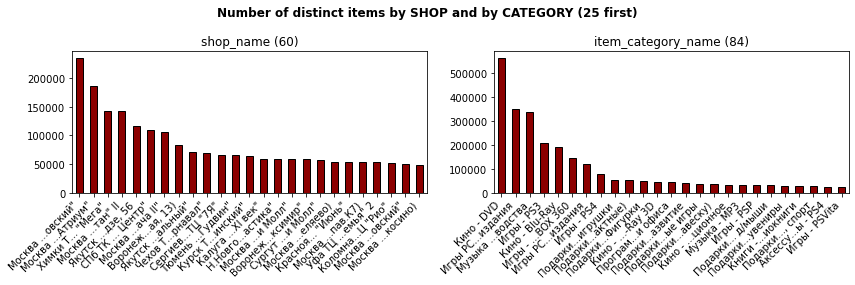

In [150]:
# explore the values of the categorical columns

cat_cols = ['shop_name', 'item_category_name']
plot_barplots(df_train, cat_cols, figsize=(12, 4), n_cols=2, n_col_limit=25,
              shorten_label=7, color='darkred', cum_plot=False,
              title="Number of distinct items by SHOP and by CATEGORY (25 first)")

In [159]:
# Pondération des histogrammes par le nombre des items
ser_weight = df_train[['shop_name', 'item_cnt_day']].groupby('shop_name').sum().iloc[:,0]

In [156]:
ser = df_train['shop_name'].value_counts()

In [183]:
a = {1,2,3}
type(a)

set

<AxesSubplot:>

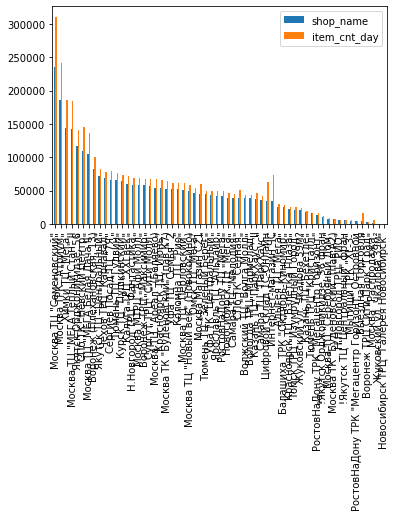

In [180]:
# table of the number of distinct items and total items sold per shop
ser_both = pd.concat([ser, ser_weight], axis=1)
ser_both.plot.bar()

In [147]:
def plot_barplots(df, cols, figsize=(12, 7), n_cols=3, n_col_limit=15, shorten_label=False,
                  color='grey', cum_plot=False, weight=False, title=None):

    n_tot = len(cols)
    n_rows = (n_tot // n_cols)+((n_tot % n_cols) > 0) * 1

    fig = plt.figure(figsize=figsize)
    for i, c in enumerate(cols, 1):
        ax = fig.add_subplot(n_rows, n_cols, i)
        ser = df[c].value_counts()
        n_cat = ser.shape[0]
        
        if n_cat > n_col_limit:
            ser=ser[0:n_col_limit]

        ser.plot.bar(color=color, ec='k', ax=ax)
        ax.set_title(c[0:20]+f' ({n_cat})')
        labels = [item.get_text() for item in ax.get_xticklabels()]

        if shorten_label:
            thr = int(shorten_label)
            lab_x = [item.get_text() for item in ax.get_xticklabels()]
            short_lab_x = [s[:thr] + '...' + s[-thr:] if len(s) > 2 * thr else s for s in lab_x]
            ax.axes.set_xticklabels(short_lab_x)
            
        if cum_plot:
            ax.plot(np.arange(ser.size), ser.cumsum(), '-or')
            
#         if weight:
#             ser*

        plt.xticks(rotation=45, ha='right')
    
    if title is not None:
        plt.gcf().suptitle(title, fontweight='bold')
        
    plt.tight_layout()
    

    plt.show()

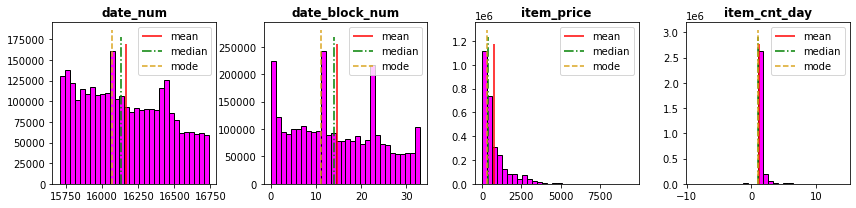

In [84]:
# histograms of the quantitative data

import numpy as np

quant_cols = df_train.select_dtypes(include=np.number).columns
quant_cols = [col for col in quant_cols if '_id' not in col]
plot_histograms(df_train, quant_cols, bins=30,
                figsize=(12, 3), color='magenta', skip_outliers=True,
                thresh=5, n_cols=4, tight_layout={'w_pad': 0.2,
                                                  'h_pad':0.65})

In [89]:
# Check the number of items sold per day

df_train['item_cnt_day'].value_counts().sort_index().to_frame().T

,-22.00,-16.00,-9.00,-6.00,-5.00,-4.00,-3.00,-2.00,-1.00,1.00,...,504.00,508.00,512.00,533.00,539.00,624.00,637.00,669.00,1000.00,2169.00
item_cnt_day,1,1,1,2,4,3,14,78,7252,2629372,...,1,1,1,1,1,1,1,1,1,1


----> Some items are returned (negative values)

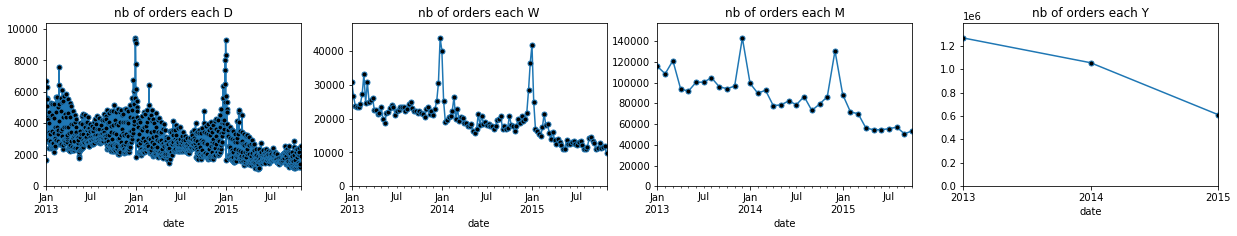

In [95]:
# Nb of items sold through time (day, week, month, year)

fig, axs = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(21,3)
fig.subplots_adjust(wspace=0.2)

for i,per in enumerate(['D', 'W', 'M', 'Y'],0):
      ser = df_train.groupby(pd.Grouper(key='date', freq=per)).size()
      ser.plot(ax=axs[i], ms=5, marker='o', mfc='k', ls='-')
      axs[i].set(ylim=(0, max(ser)*1.1)) # xlim=('2013-10-01', '2019-04-01')
      axs[i].set_title("nb of orders each "+per)

- We notice cycle effects (increase in sales for Christmas)
- Sales are decreasing consistently through time (:2 in 3 years
- effect for each day of the week to investigate

In [ ]:
# display same values with rolling

f_roll = lambda x: x.rolling(3, min_periods=1).mean()

fig, axs = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(21,3)
fig.subplots_adjust(wspace=0.2)

for i, per in enumerate(['D', 'W', 'M', 'Y'], ):
      ser = df_train.groupby(pd.Grouper(key='date', freq=per)).size()
      ser.plot(ax=axs[i], ms=5, marker='o', mfc='k', ls='-')
      axs[i].set(ylim=(0, max(ser)*1.1)) # xlim=('2013-10-01', '2019-04-01')
      axs[i].set_title("nb of orders each "+per)

In [ ]:
reg = get_reg(X,Y)
my_text = 'tot val of order leads = {:.5f} * nb of days + {:.0f}'.format(reg.coef_.ravel()[0],
                                                                         reg.intercept_.ravel()[0])
fig.text(0.15,0.7, my_text, color='black')
plt.show()

In [ ]:
def get_reg(X,Y):
  df = pd.DataFrame({'x': X, 'y': Y}).dropna(how='any')
  x_, y_  = [(df.loc[:,c]).values.reshape(-1,1) for c in df.columns]
  x__ = x_-x_[0]
  reg = LinearRegression().fit(x__,y_)
  return reg

The linear regression shows the same conclusion as above, with average on 30 rolling days. 

In [ ]:
# Plot the histogram for the main categories

cols =  [col for col in df_1.columns if col in (f64_cols + int_cols)]

plot_cat_histograms(df=X_train,
                    ind_tuple=(target_0_df.index, target_1_df.index),
                    cols=cols, labels = ('repaid', 'not repaid'),
                    colors = ('green', 'red'),
                    bins=30, figwidth=20, n_cols=3, tight_layout=True, 
                    skip_outliers=True, thresh=5, sh_tit=20)

#### Feature  ideas

- Number of week-end days in the month